# ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram_by_dataset, 
    plot_pie_chart_by_dataset, 
    visualize_image,
    plot_bar_by_dataset,
    plot_histogram_by_group,
    plot_scatter_size_coded,
    plot_scatter_hexbin
    )
from calcium_activity_characterization.analysis.loaders import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals

sns.set(style="whitegrid")

# Define paths to control datasets
control_paths = {
    "20250326 - IS3": "D:/Mateo/20250326/Output/IS1"
}

# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")
communications = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/communications.csv")

## POPULATION

### Binary & Heatmap Raster Plot

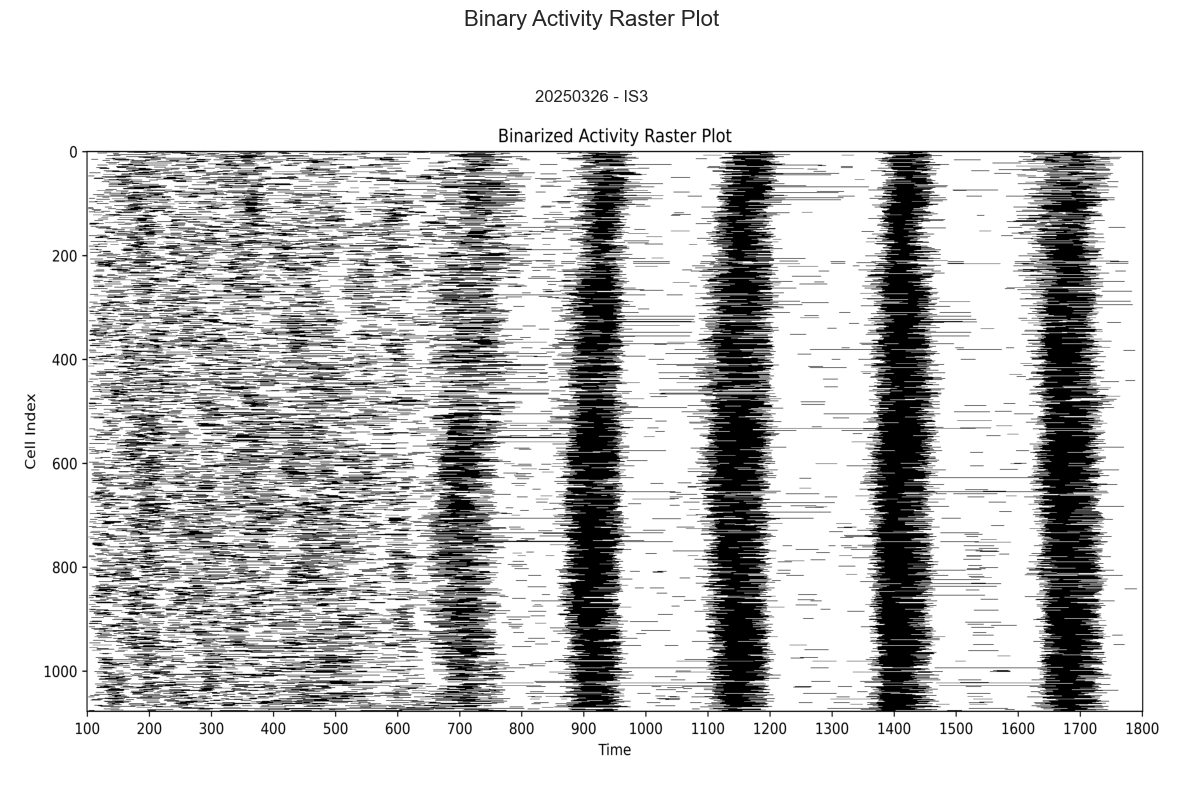

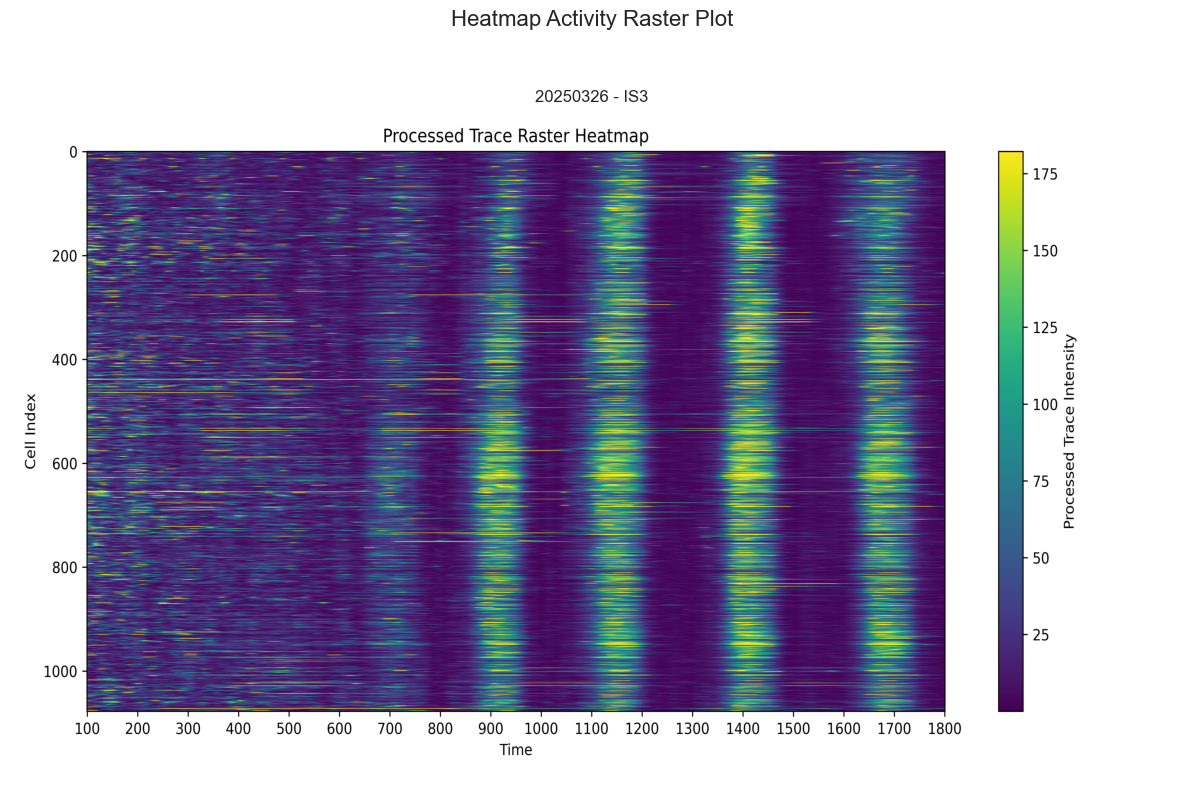

In [2]:
visualize_image(
    dataset_paths=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    n_cols=1,
    figsize_per_plot=(12, 8)
)
visualize_image(
    dataset_paths=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    n_cols=1,
    figsize_per_plot=(12, 8)
)

### Peaks population

In [3]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 12028
Total number of cells: 1078


### Peaks statistics

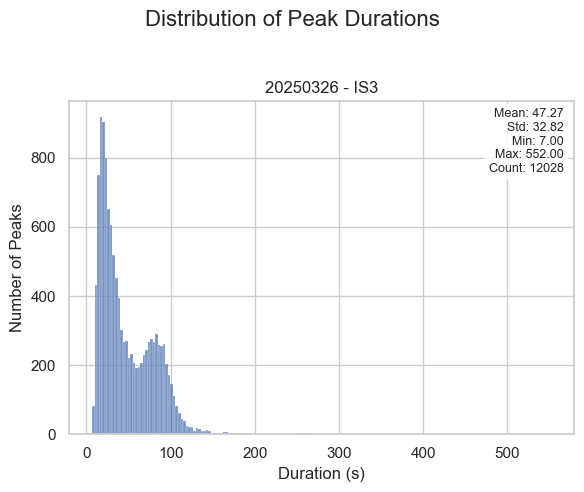

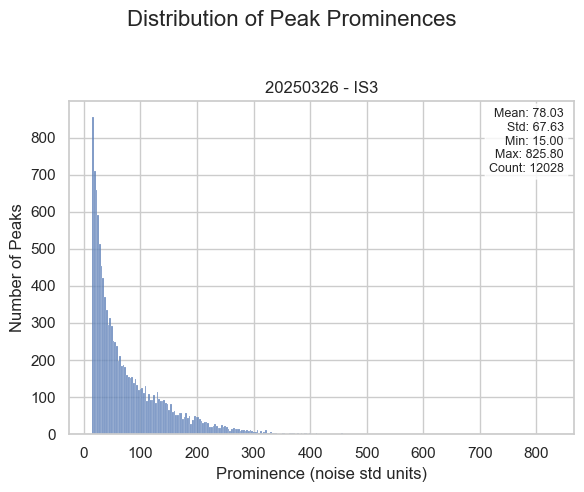

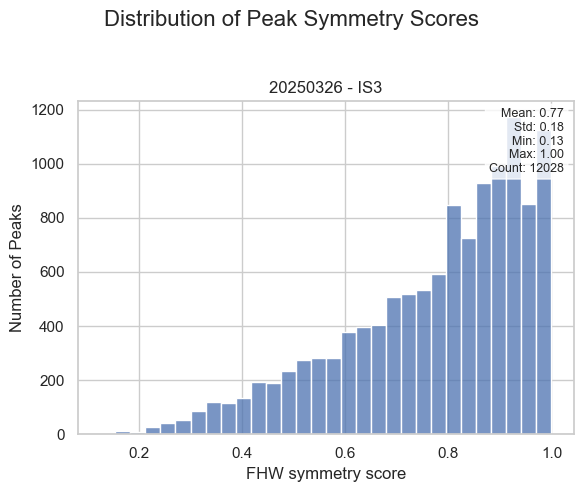

In [4]:
plot_histogram_by_dataset(
    df=peaks,
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks,
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks,
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

### Distribution of peaks per event types

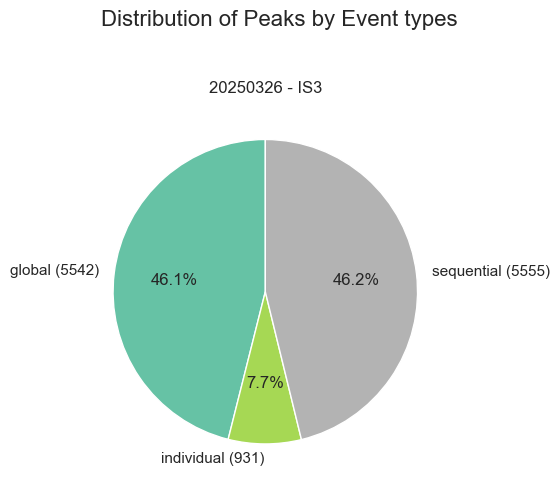

In [5]:
plot_pie_chart_by_dataset(
    df=peaks,
    column="In event",
    title="Distribution of Peaks by Event types",
    n_cols=1,
    palette="Set2"
)

### Peaks statistics per event types

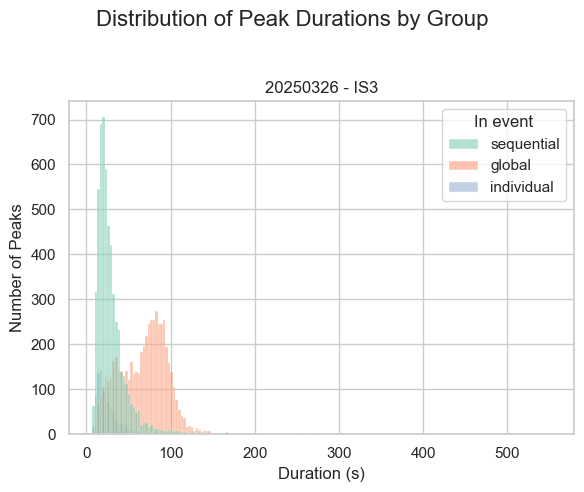

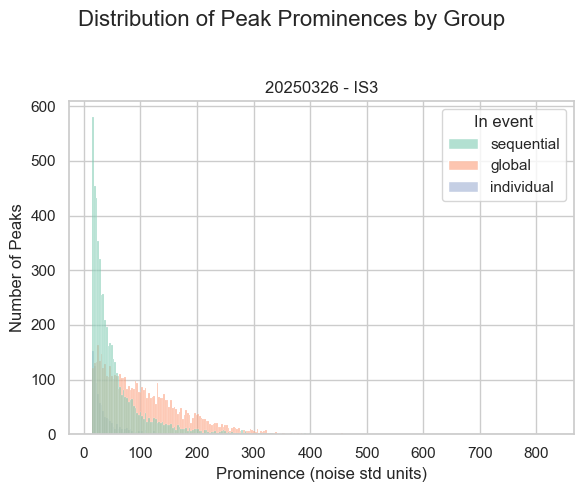

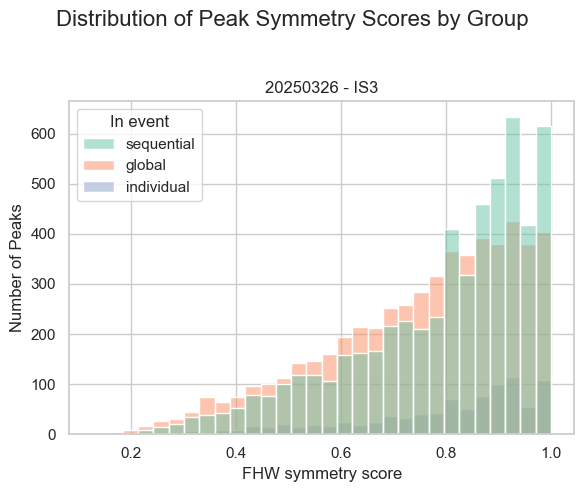

In [6]:
peaks["In event"] = peaks["In event"].fillna("individual")
plot_histogram_by_group(
    df=peaks,
    value_column="Duration (s)",
    group_column="In event",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks,
    value_column="Prominence (noise std units)",
    group_column="In event",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks,
    value_column="FHW symmetry score",
    group_column="In event",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

## GLOBAL EVENTS

### Peak statistics in global events

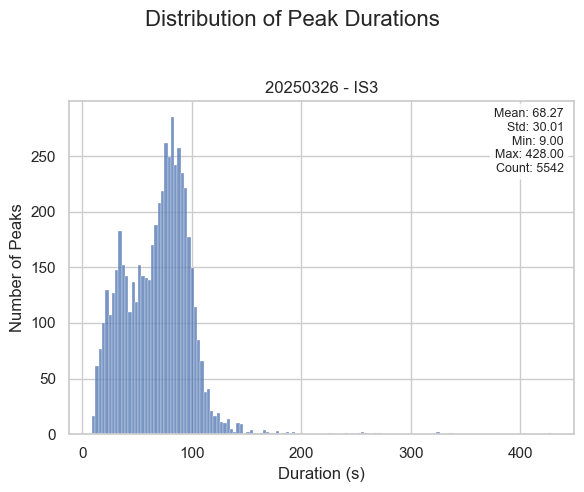

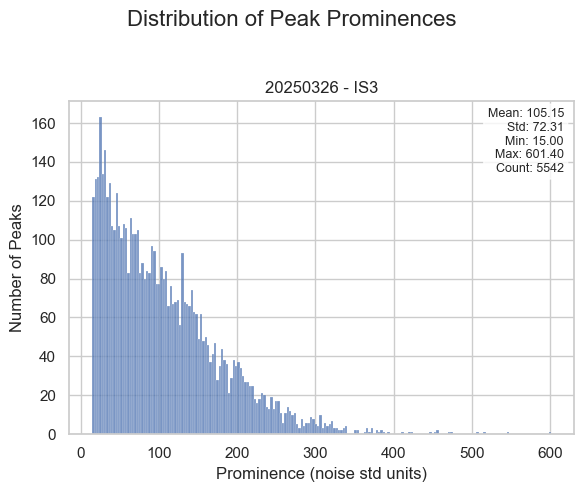

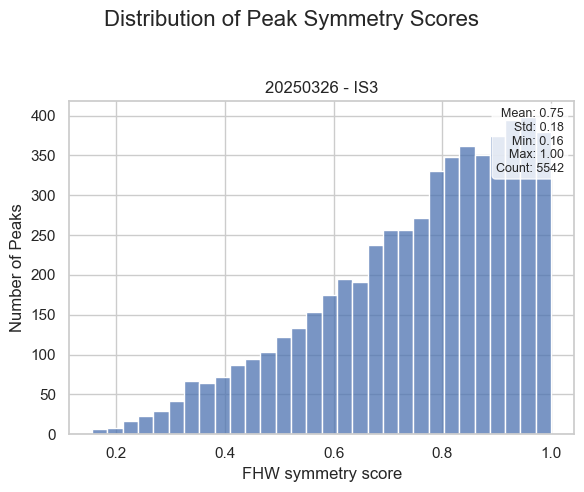

In [7]:
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "global"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "global"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "global"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

### Peak statistics in global event per event ID

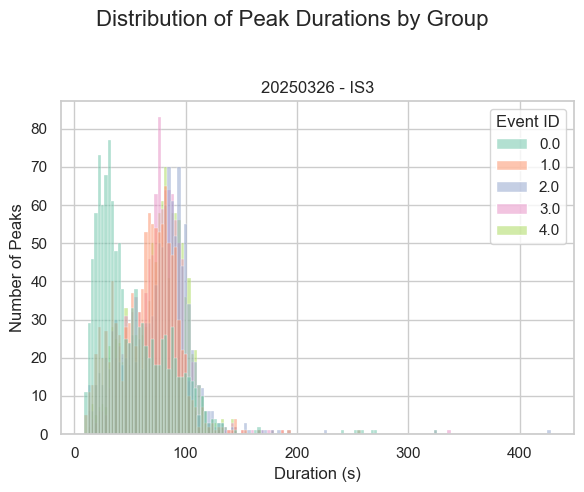

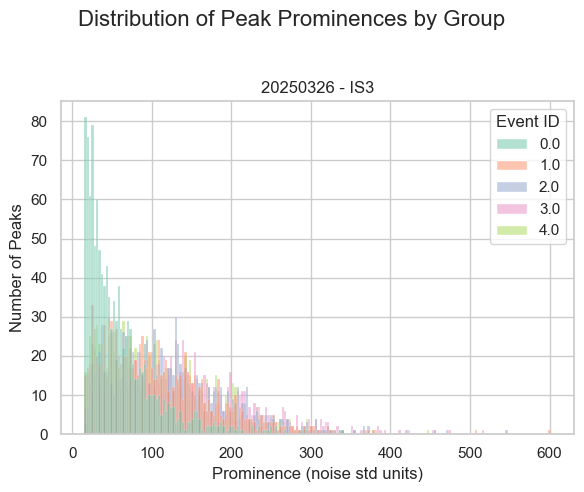

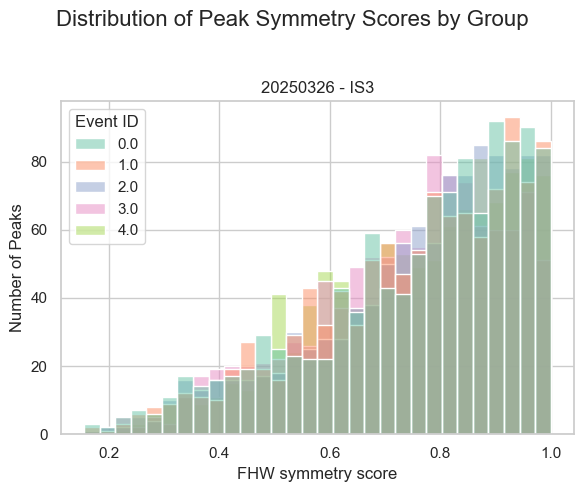

In [8]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Duration (s)",
    group_column="Event ID",
    title="Distribution of Peak Durations by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="Prominence (noise std units)",
    group_column="Event ID",
    title="Distribution of Peak Prominences by Group",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "global"],
    value_column="FHW symmetry score",
    group_column="Event ID",
    title="Distribution of Peak Symmetry Scores by Group",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

### Kinetics of global events

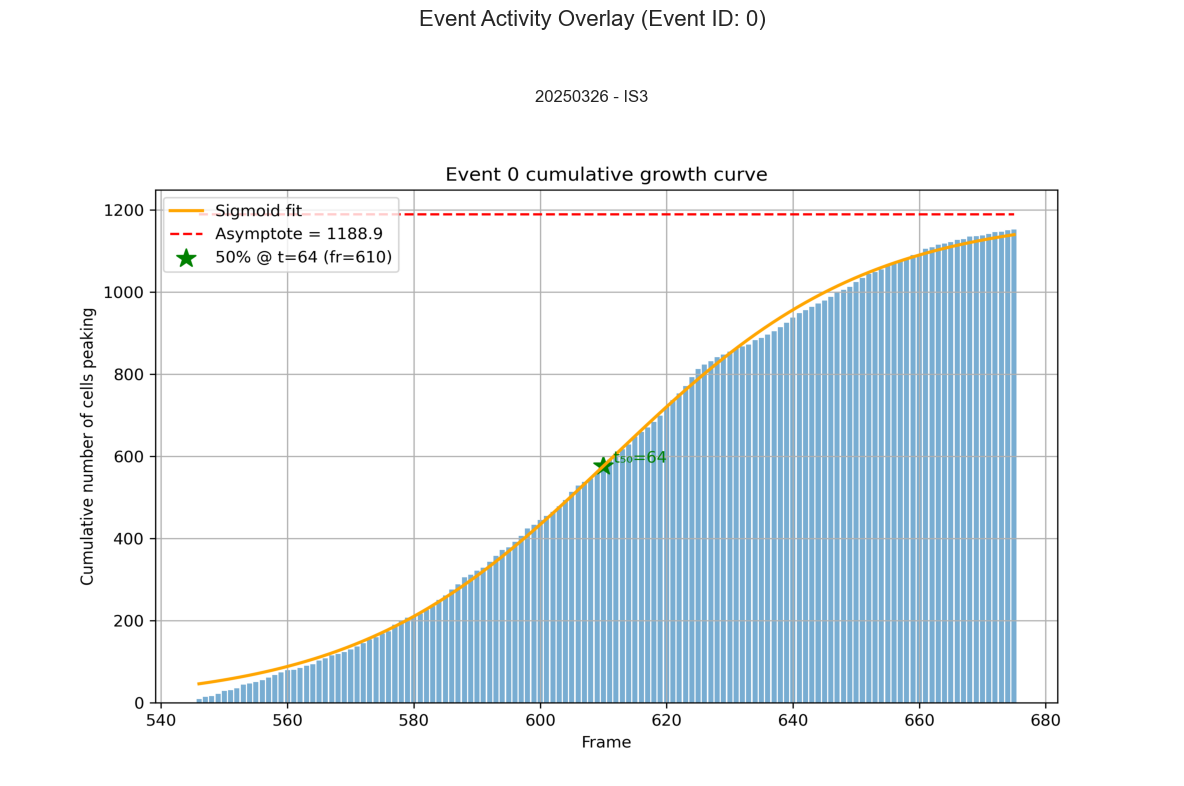

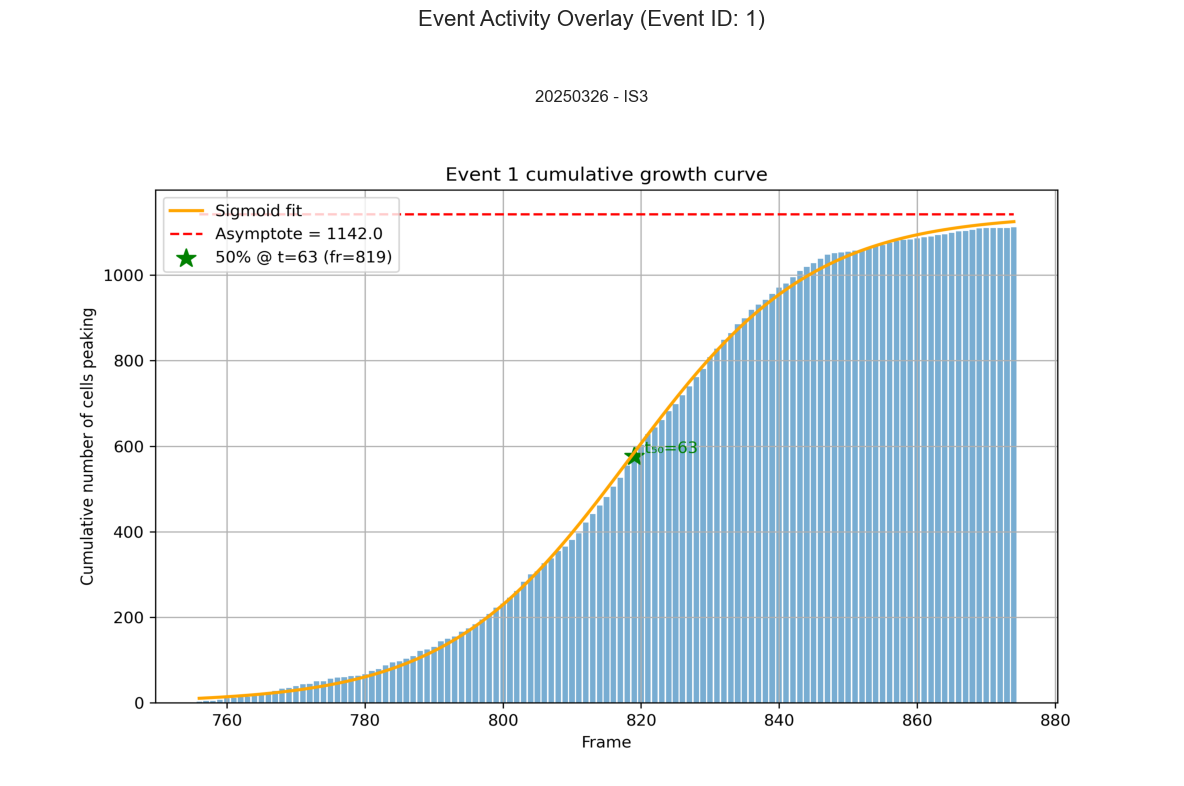

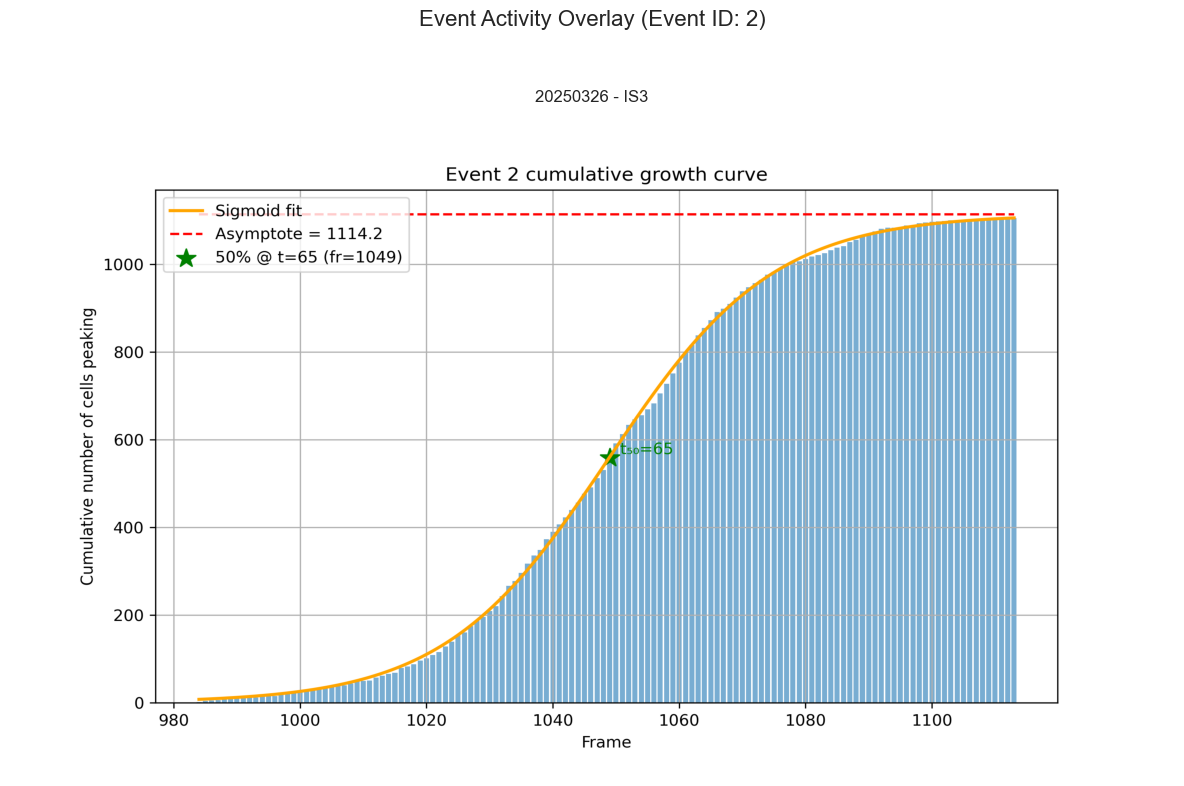

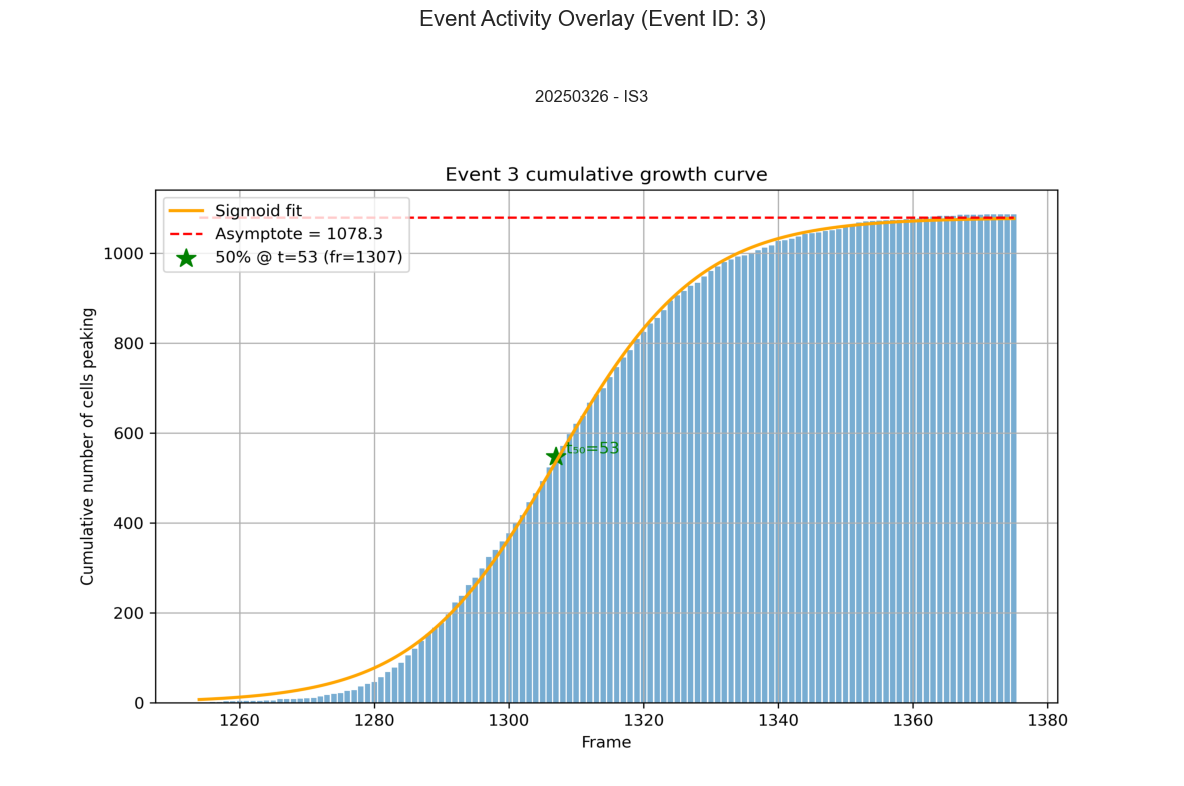

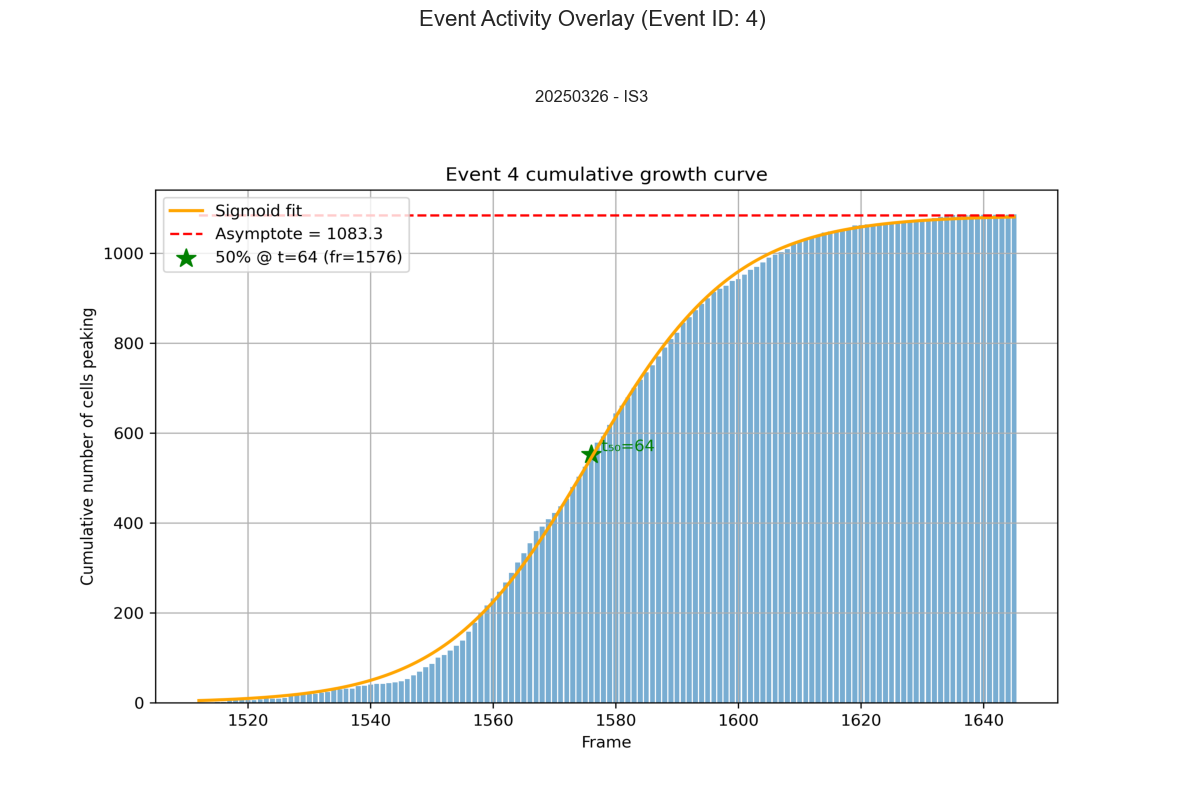

In [9]:
global_events = events[events["Event type"] == "GlobalEvent"].copy()

for event_id in global_events["Event ID"]:
    visualize_image(
        dataset_paths=control_paths,
        image_name=f"events/event-growth-curve-{event_id}.png",
        title=f"Event Activity Overlay (Event ID: {event_id})",
        n_cols=1,
        figsize_per_plot=(12, 8)
    )

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


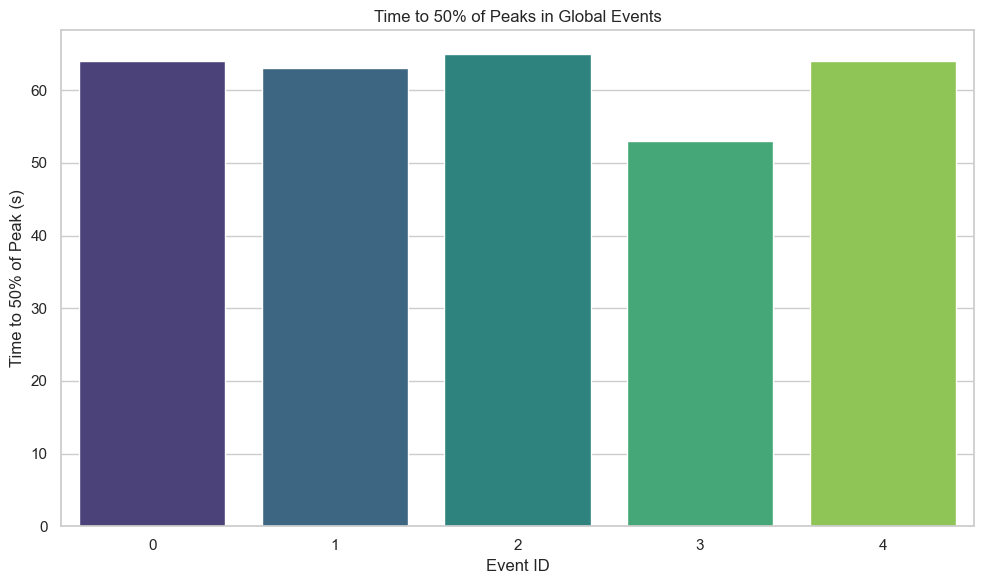

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


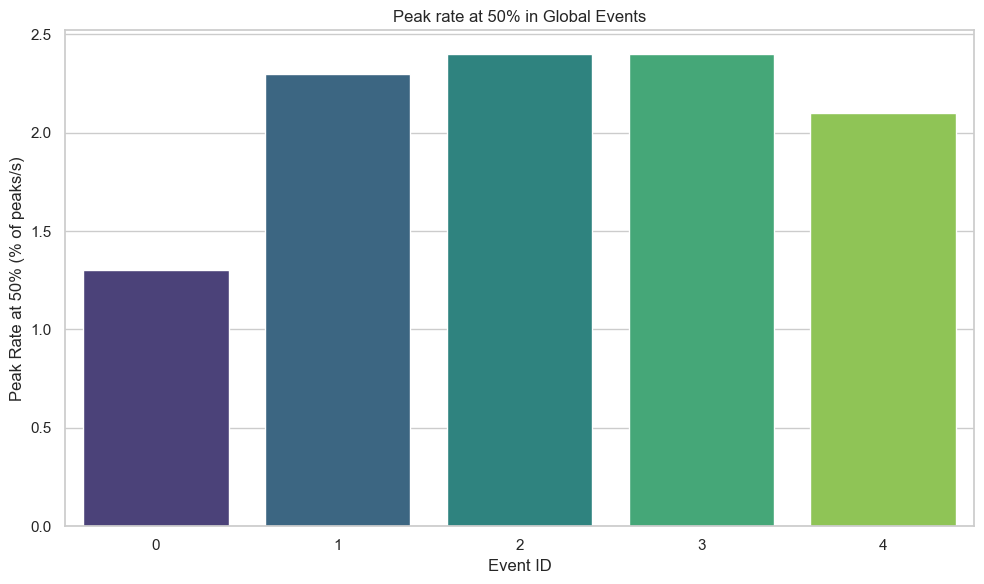

In [10]:
plot_bar_by_dataset(
    df=global_events,
    axis_column="Event ID",
    value_column="Time to 50% (s)",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0
)
plot_bar_by_dataset(
    df=global_events,
    axis_column="Event ID",
    value_column="Normalized peak rate at 50% (% of peaks/s)",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (% of peaks/s)",
    xlabel="Event ID",
    rotation=0
)

### Cells occurences in global events

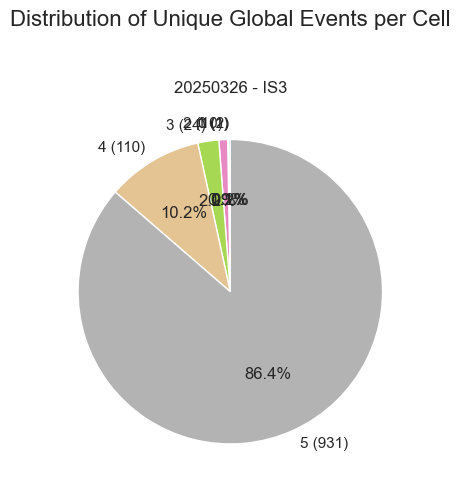

In [11]:
plot_pie_chart_by_dataset(
    df=cells,
    column="Occurences in global events",
    title="Distribution of Unique Global Events per Cell",
    n_cols=1,
    palette="Set2"
)

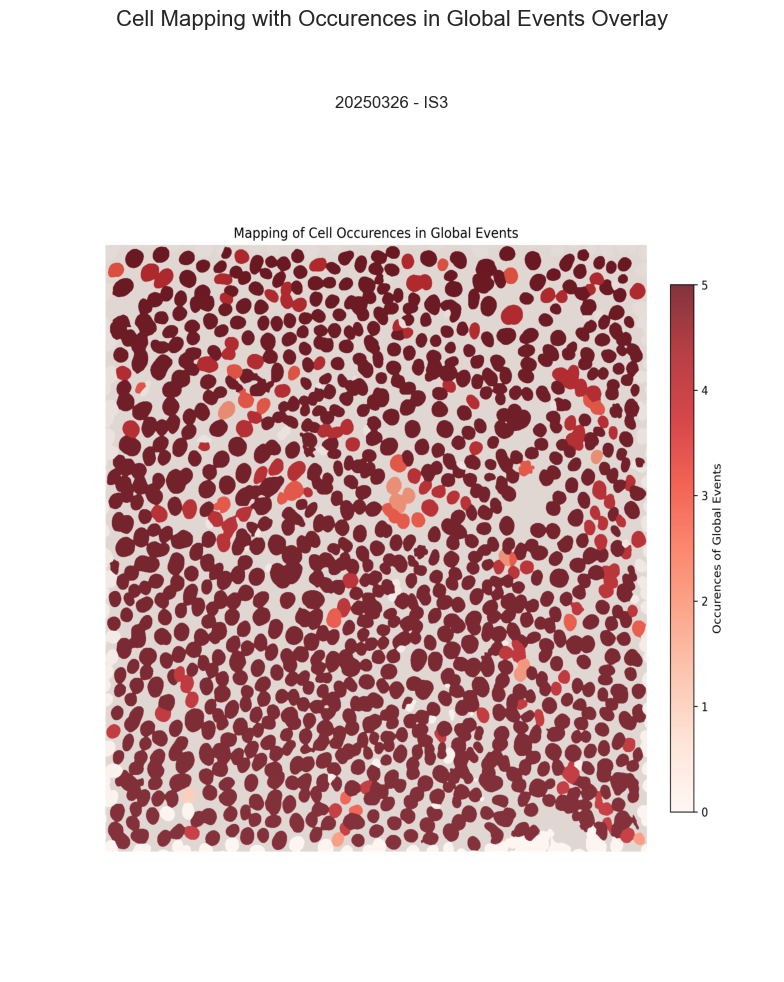

In [12]:
visualize_image(
    dataset_paths=control_paths,
    image_name="cell-mapping/cell_occurences_in_global_events_overlay.png",
    title="Cell Mapping with Occurences in Global Events Overlay",
    n_cols=1,
    figsize_per_plot=(8, 10)
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


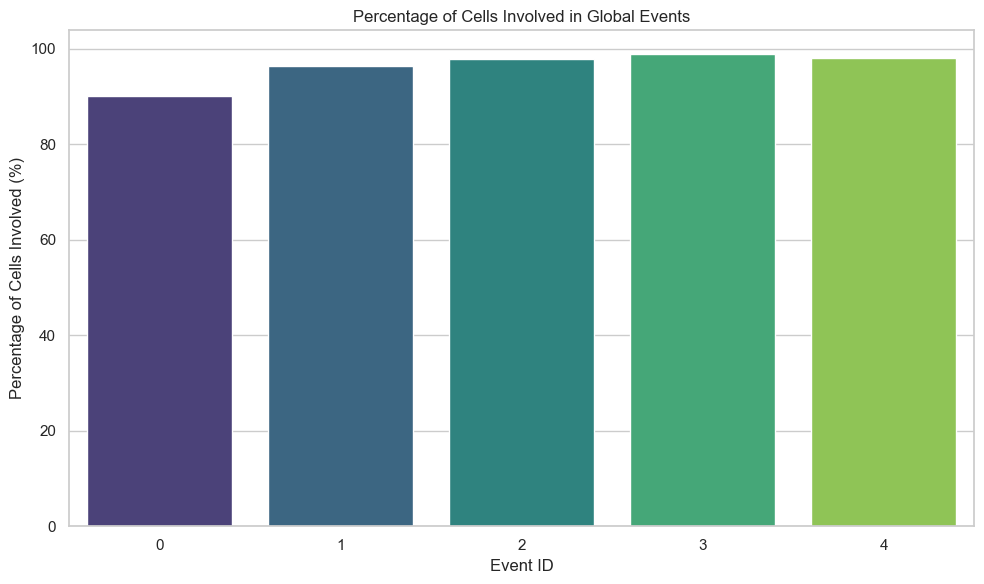

In [13]:
global_events["% of cells involved"] = 100 * global_events["Number of cells involved"] / len(cells)

plot_bar_by_dataset(
    df=global_events,
    axis_column="Event ID",
    value_column="% of cells involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

### Inter-event interval analysis

In [14]:
intervals, periodicity, frequency = analyze_peak_intervals(events[events["Event type"] == "GlobalEvent"]["Event peak time (s)"].tolist())

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} Hz")

Intervals between global event peaks: [209.0, 228.0, 260.0, 267.0]
Estimated periodicity: 0.911
The global events exhibit a regular periodic pattern.
Estimated frequency (1/mean interval): 0.004 Hz


## SEQUENTIAL EVENTS

### Cells occurences in sequencial events

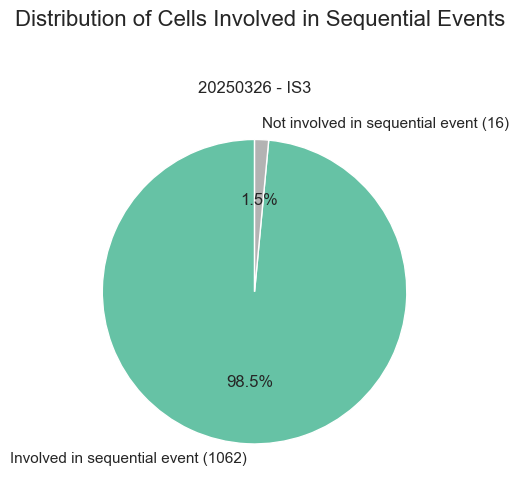

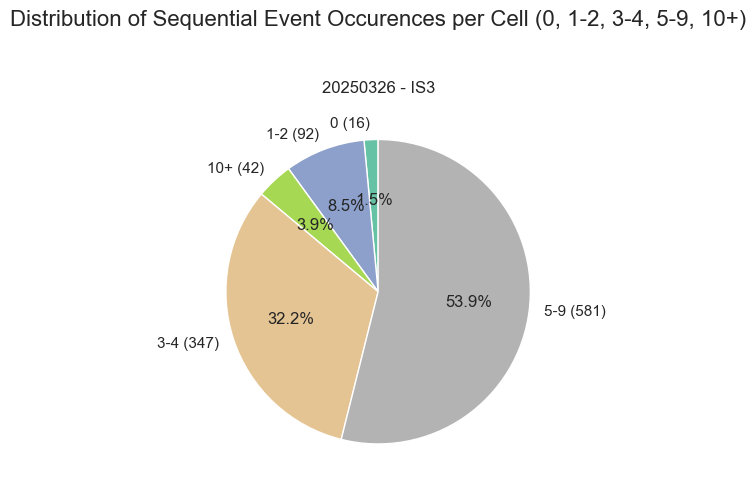

In [15]:
cells["Involved in sequential event"] = cells["Occurences in sequential events"].apply(lambda x: "Involved in sequential event" if x > 0 else "Not involved in sequential event")

plot_pie_chart_by_dataset(
    df=cells,
    column="Involved in sequential event",
    title="Distribution of Cells Involved in Sequential Events",
    n_cols=1,
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1 or n == 2:
        return "1-2"
    elif n == 3 or n == 4:
        return "3-4"
    elif n < 10:
        return "5-9"
    else:
        return "10+"

cells["Occurences in sequential events category"] = cells["Occurences in sequential events"].apply(cells_category)

plot_pie_chart_by_dataset(
    df=cells,
    column="Occurences in sequential events category",
    title="Distribution of Sequential Event Occurences per Cell (0, 1-2, 3-4, 5-9, 10+)",
    n_cols=1,
    palette="Set2"
)

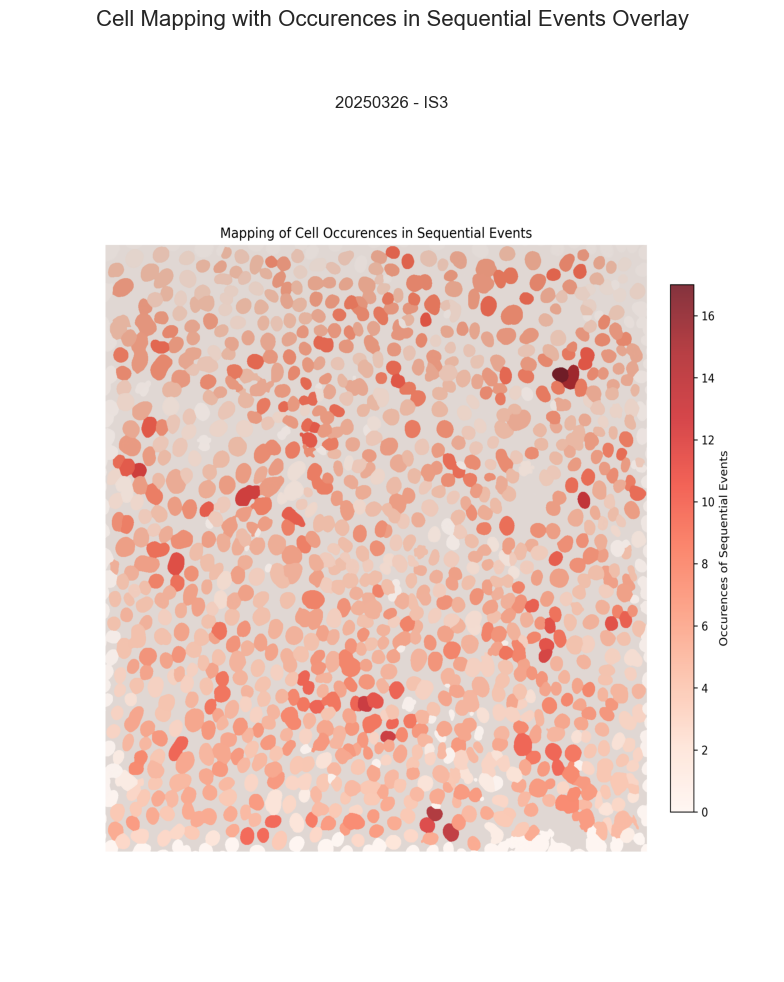

In [16]:
visualize_image(
    dataset_paths=control_paths,
    image_name="cell-mapping/cell_occurences_in_sequential_events_overlay.png",
    title="Cell Mapping with Occurences in Sequential Events Overlay",
    n_cols=1,
    figsize_per_plot=(8, 10)
)

### Peaks statistics in sequential events

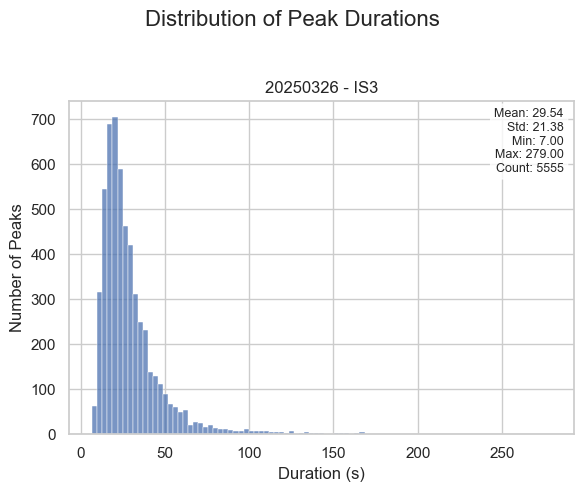

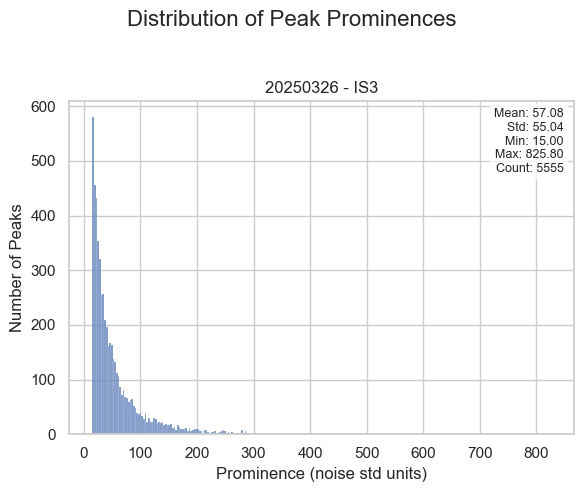

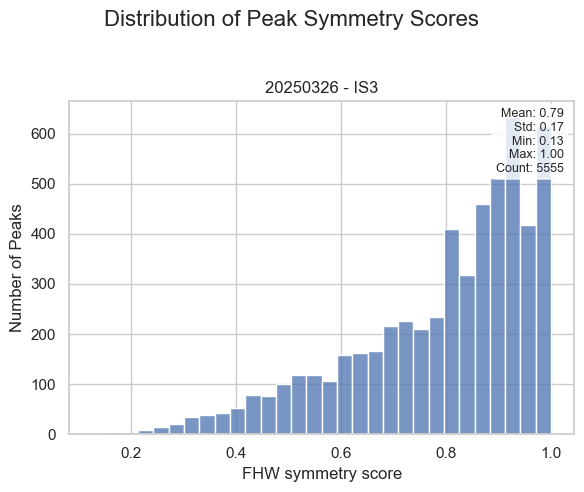

In [17]:
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "sequential"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "sequential"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "sequential"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

### Cell-cell communication speed

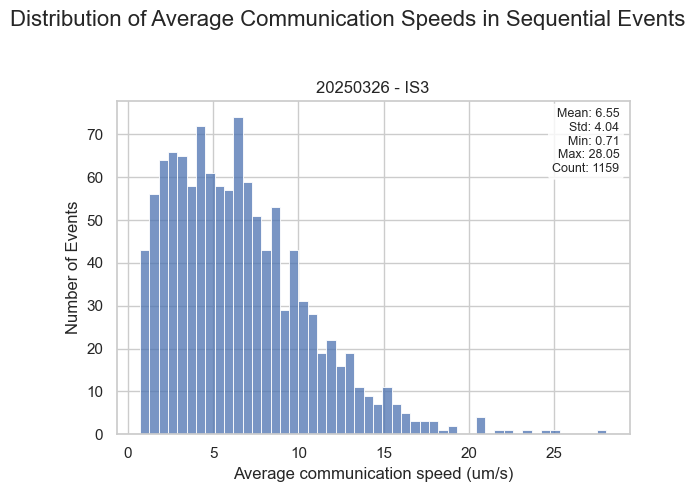

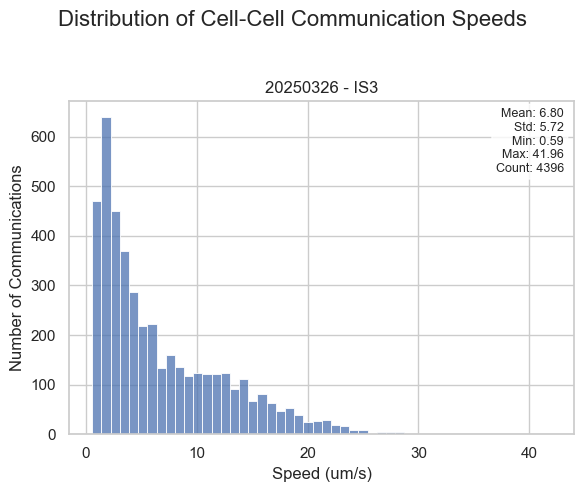

In [18]:
sequential_events = events[events["Event type"] == "SequentialEvent"].copy()
plot_histogram_by_dataset(
    df=sequential_events,
    column="Average communication speed (um/s)",
    title="Distribution of Average Communication Speeds in Sequential Events",
    ylabel="Number of Events",
    bin_count=50,
    n_cols=1
)

plot_histogram_by_dataset(
    df=communications,
    column="Speed (um/s)",
    title="Distribution of Cell-Cell Communication Speeds",
    ylabel="Number of Communications",
    bin_count=50,
    n_cols=1
)

### Number of cells involved per sequential events

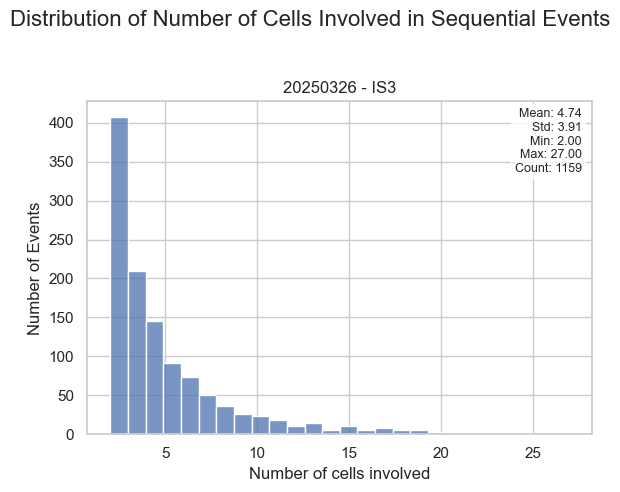

In [19]:
plot_histogram_by_dataset(
    df=sequential_events,
    column="Number of cells involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    ylabel="Number of Events",
    bin_width=1,
    n_cols=1
)

### Influence of cell count per event on statistics

In [20]:
def seq_events_category(n: int) -> str:
    if n == 2:
        return "2"
    elif n == 3:
        return "3"
    elif n == 4:
        return "4"
    elif 5 <= n <= 10:
        return "5-10"
    else:
        return "11+"

sequential_events["Number of cells involved category"] = sequential_events["Number of cells involved"].apply(seq_events_category)

# Assign 'Number of cells involved category' to peaks based on their sequential event
peaks.loc[peaks["In event"] == "sequential", "Number of cells involved category"] = (
    peaks.loc[peaks["In event"] == "sequential", "Event ID"]
    .map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

# Assign 'Number of cells involved category' to communications based on their Event ID
communications["Number of cells involved category"] = (
    communications["Event ID"].map(sequential_events.set_index("Event ID")["Number of cells involved category"])
)

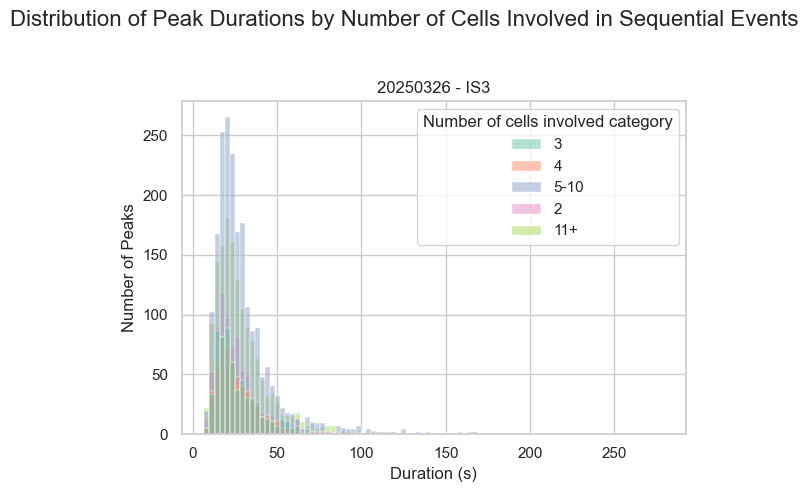

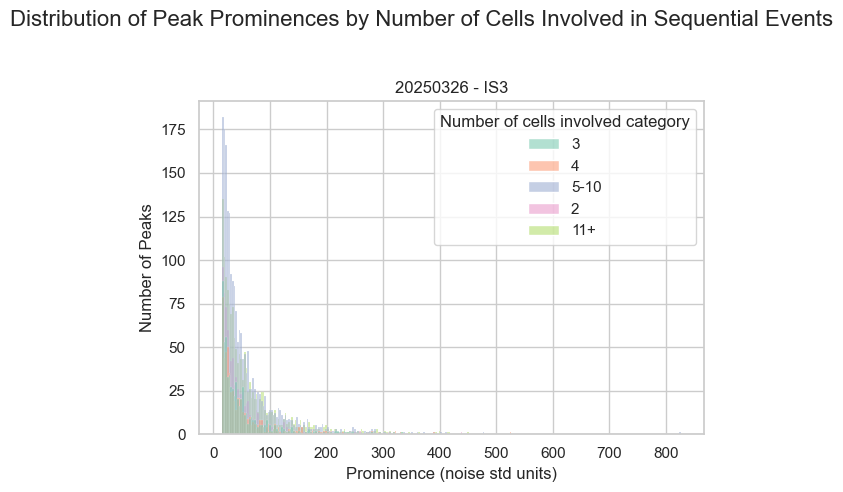

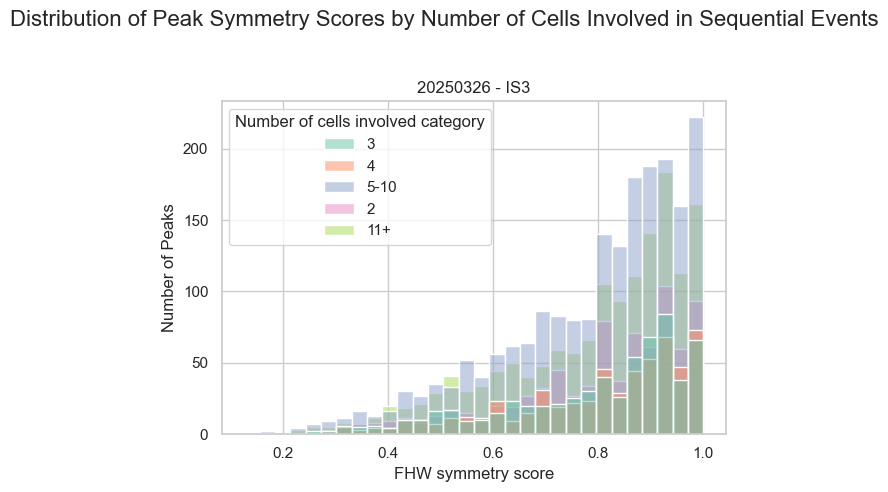

In [21]:
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Duration (s)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Durations by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="Prominence (noise std units)",
    group_column="Number of cells involved category",
    title="Distribution of Peak Prominences by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks[peaks["In event"] == "sequential"],
    value_column="FHW symmetry score",
    group_column="Number of cells involved category",
    title="Distribution of Peak Symmetry Scores by Number of Cells Involved in Sequential Events",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

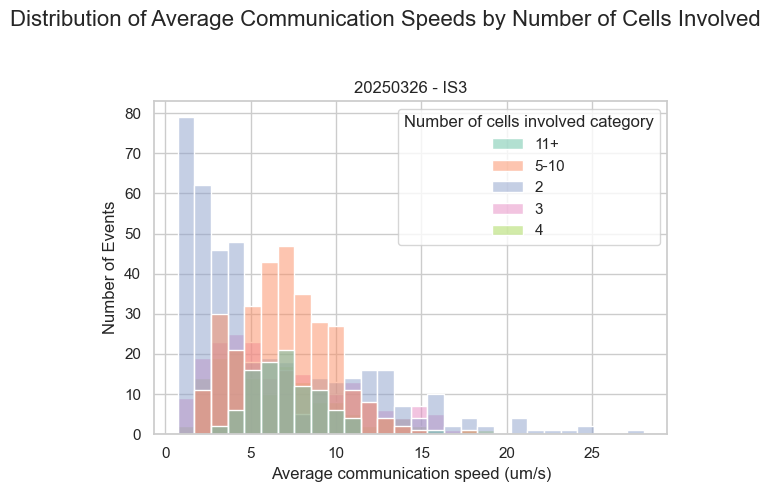

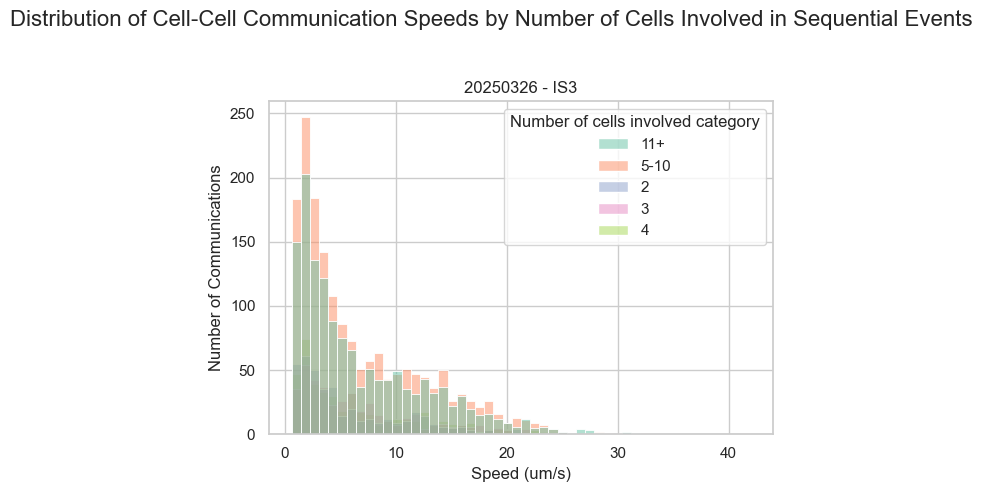

In [22]:
plot_histogram_by_group(
    df=sequential_events,
    value_column="Average communication speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Average Communication Speeds by Number of Cells Involved",
    ylabel="Number of Events",
    bin_width=1,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

plot_histogram_by_group(
    df=communications,
    value_column="Speed (um/s)",
    group_column="Number of cells involved category",
    title="Distribution of Cell-Cell Communication Speeds by Number of Cells Involved in Sequential Events",
    ylabel="Number of Communications",
    bin_count=50,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

### Cells occurences as origin in sequential events

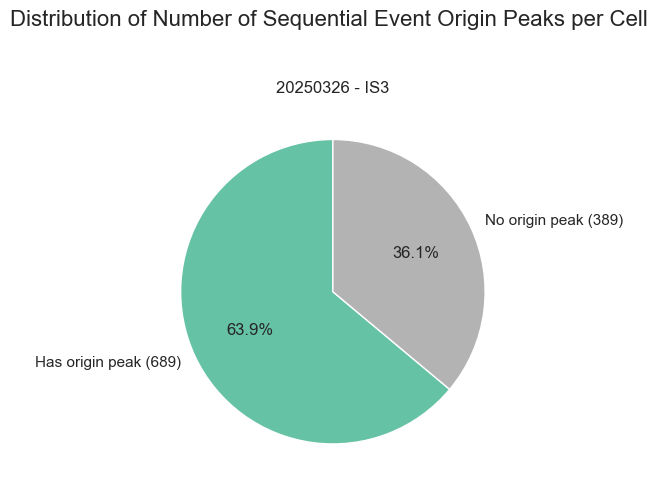

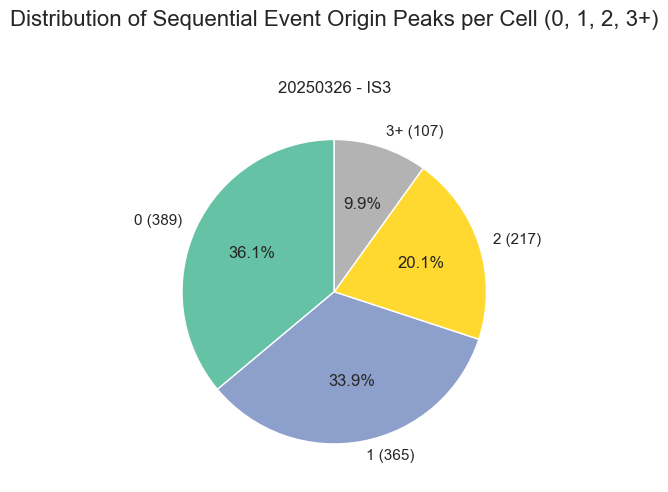

In [23]:
cells["Has origin peak"] = cells["Occurences in sequential events as origin"].apply(lambda x: "Has origin peak" if x > 0 else "No origin peak")
plot_pie_chart_by_dataset(
    df=cells,
    column="Has origin peak",
    title="Distribution of Number of Sequential Event Origin Peaks per Cell",
    n_cols=1,
    palette="Set2"
)
def origin_peak_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    else:
        return "3+"

cells["Origin peak category"] = cells["Occurences in sequential events as origin"].apply(origin_peak_category)

plot_pie_chart_by_dataset(
    df=cells,
    column="Origin peak category",
    title="Distribution of Sequential Event Origin Peaks per Cell (0, 1, 2, 3+)",
    n_cols=1,
    palette="Set2"
)


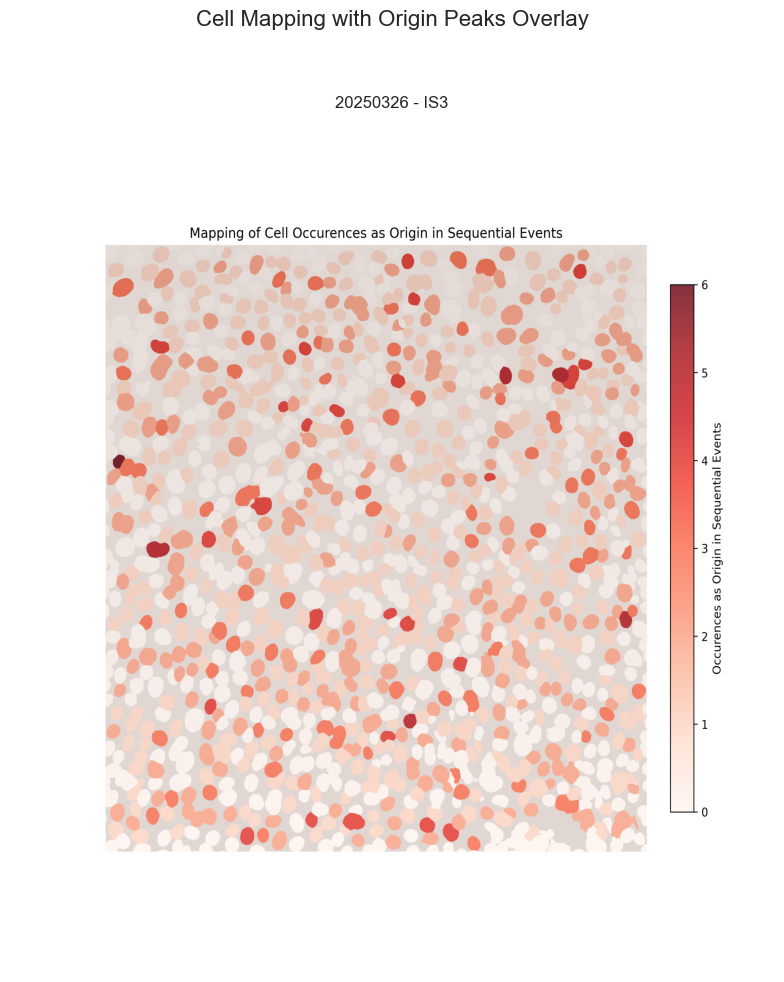

In [24]:
visualize_image(
    dataset_paths=control_paths,
    image_name="cell-mapping/cell_occurences_in_origin_seq_events_overlay.png",
    title="Cell Mapping with Origin Peaks Overlay",
    n_cols=1,
    figsize_per_plot=(8, 10)
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


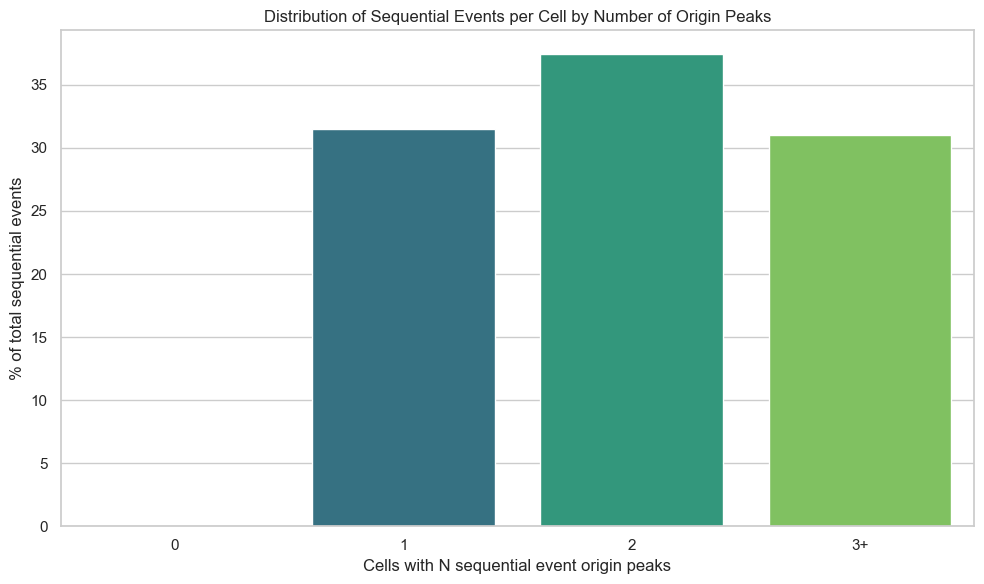

In [25]:
# Sum the total number of sequential origin peaks for each exact value (0, 1, 2, 3, ...)
total_peaks_per_exact_value = (
    cells.groupby("Origin peak category")
    ["Occurences in sequential events as origin"]
    .sum()
    .reset_index(name="Total origin peaks")
)

# Compute normalized percentage
total_sum = total_peaks_per_exact_value["Total origin peaks"].sum()
total_peaks_per_exact_value["% of total"] = (
    total_peaks_per_exact_value["Total origin peaks"] / total_sum * 100
).round(2)

plot_bar_by_dataset(
    df=total_peaks_per_exact_value,
    axis_column="Origin peak category",
    value_column="% of total",
    title="Distribution of Sequential Events per Cell by Number of Origin Peaks",
    ylabel="% of total sequential events",
    xlabel="Cells with N sequential event origin peaks",
    rotation=0
)

### Connection network between cells

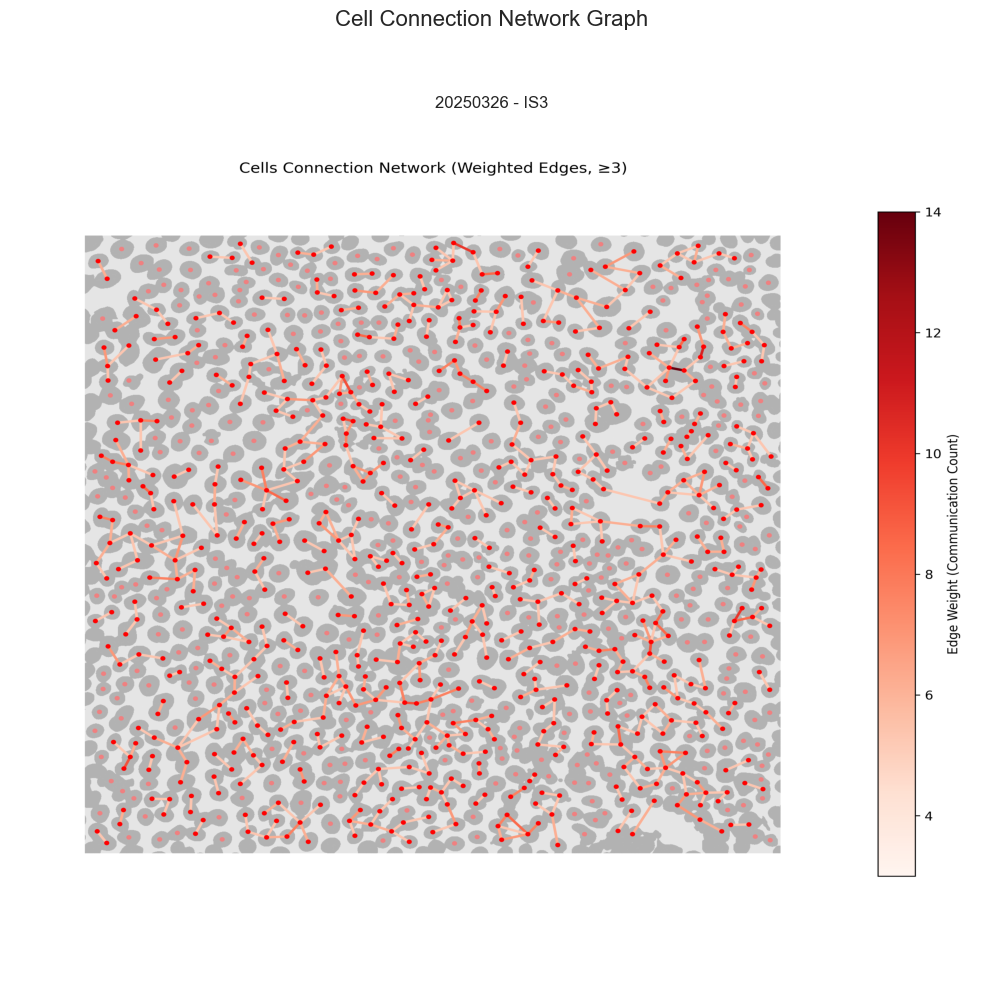

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


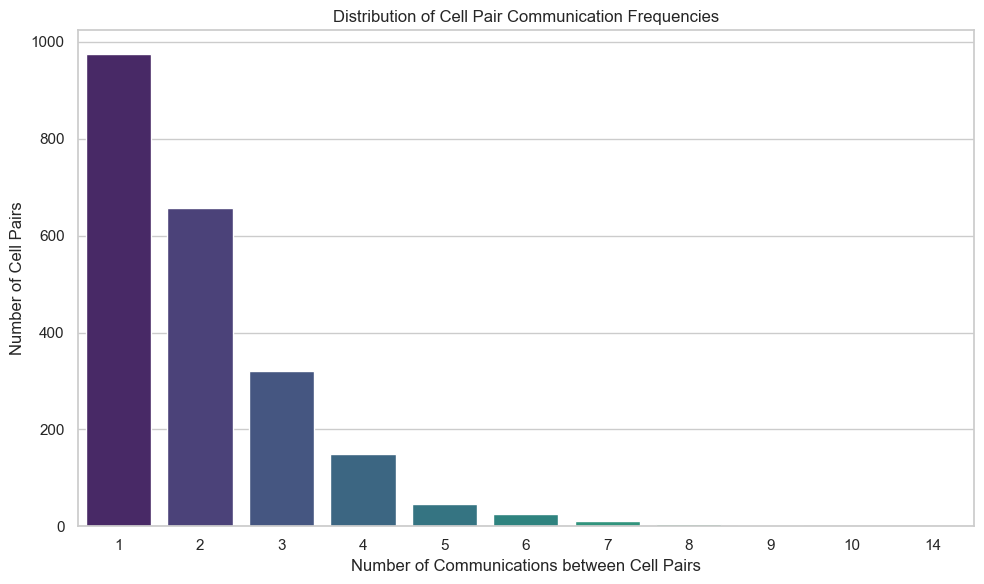

In [26]:
visualize_image(
    dataset_paths=control_paths,
    image_name="cell-mapping/cell_connection_network.png",
    title="Cell Connection Network Graph",
    n_cols=1,
    figsize_per_plot=(10, 10)
)

# Create a tuple for each cell pair (order-independent)
cell_pairs = communications.apply(
    lambda row: tuple(sorted([row["Origin Cell ID"], row["Cause Cell ID"]])), axis=1
)

# Count occurrences of each cell pair
pair_counts = cell_pairs.value_counts()

# Count how many pairs have each occurrence count
occurrence_distribution = pair_counts.value_counts().sort_index()

occurrence_distribution.name = "Number of Cell Pairs"
occurrence_distribution.index.name = "Number of Communications between Cell Pairs"

cells_connection_network = occurrence_distribution.reset_index()

cells_connection_network.columns = ["Number of Communications between Cell Pairs", "Number of Cell Pairs"]

plot_bar_by_dataset(
    df=cells_connection_network,
    axis_column="Number of Communications between Cell Pairs",
    value_column="Number of Cell Pairs",
    title="Distribution of Cell Pair Communication Frequencies",
    xlabel="Number of Communications between Cell Pairs",
    ylabel="Number of Cell Pairs",
    rotation=0
)

## INDIVIDUAL EVENTS

### Cells occurences in individual events

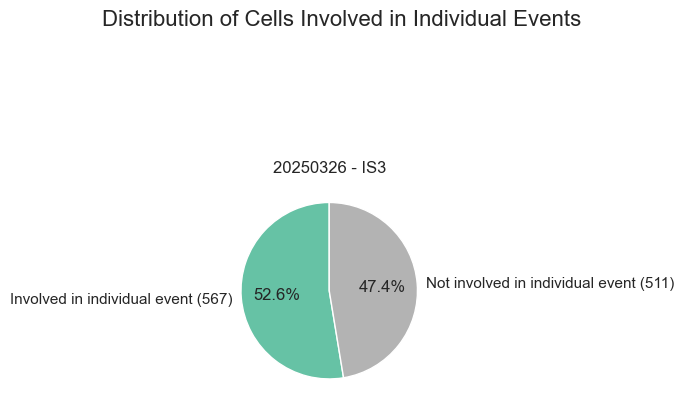

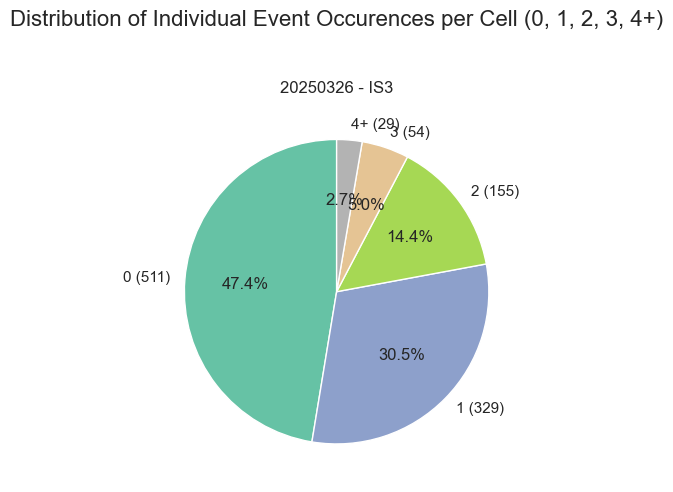

In [27]:
cells["Involved in individual event"] = cells["Occurences in individual events"].apply(lambda x: "Involved in individual event" if x > 0 else "Not involved in individual event")

plot_pie_chart_by_dataset(
    df=cells,
    column="Involved in individual event",
    title="Distribution of Cells Involved in Individual Events",
    n_cols=1,
    palette="Set2"
)

def cells_category(n: int) -> str:
    if n == 0:
        return "0"
    elif n == 1:
        return "1"
    elif n == 2:
        return "2"
    elif n == 3:
        return "3"
    else:
        return "4+"

cells["Occurences in individual events category"] = cells["Occurences in individual events"].apply(cells_category)

plot_pie_chart_by_dataset(
    df=cells,
    column="Occurences in individual events category",
    title="Distribution of Individual Event Occurences per Cell (0, 1, 2, 3, 4+)",
    n_cols=1,
    palette="Set2"
)

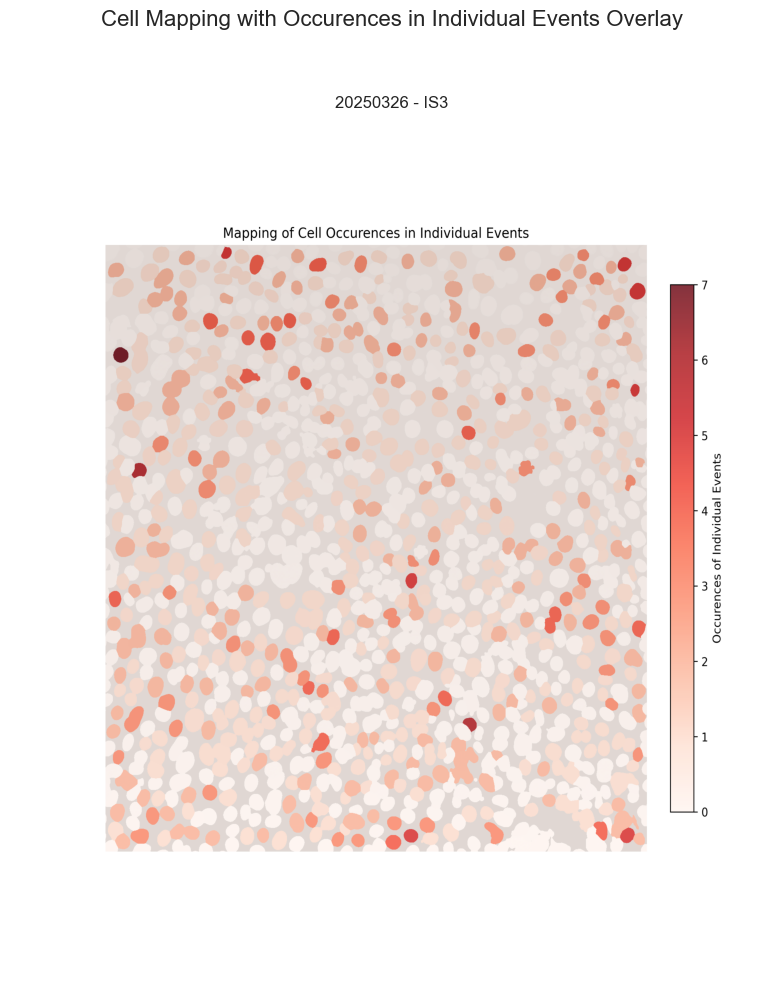

In [28]:
visualize_image(
    dataset_paths=control_paths,
    image_name="cell-mapping/cell_occurences_in_individual_events_overlay.png",
    title="Cell Mapping with Occurences in Individual Events Overlay",
    n_cols=1,
    figsize_per_plot=(8, 10)
)

### Peaks statistics in individual events

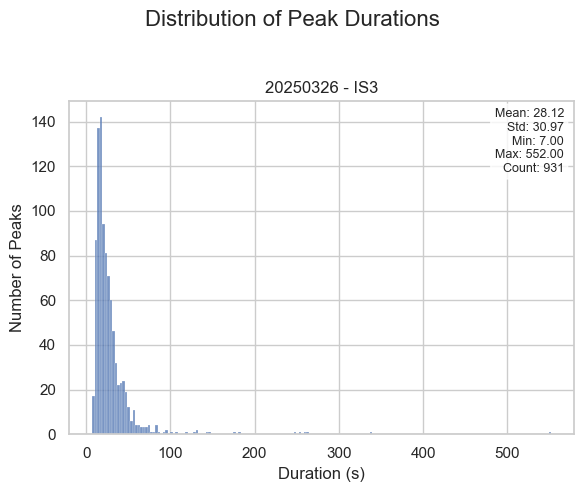

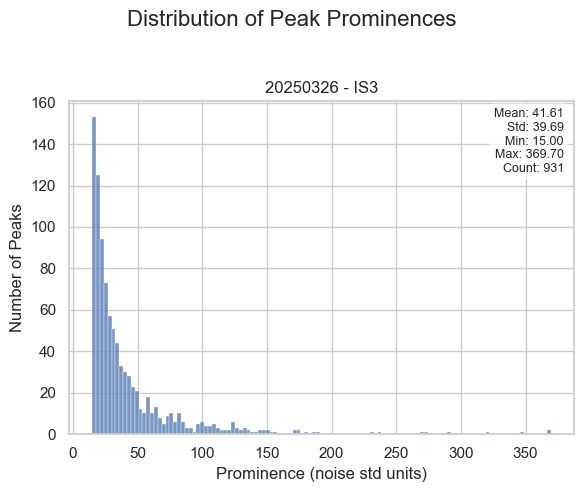

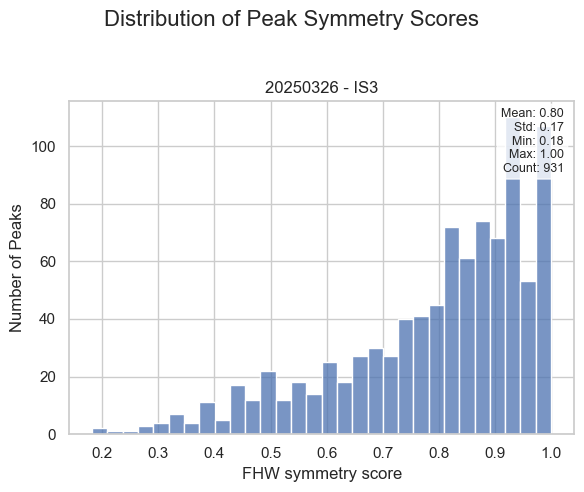

In [29]:
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "individual"],
    column="Duration (s)",
    title="Distribution of Peak Durations",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "individual"],
    column="Prominence (noise std units)",
    title="Distribution of Peak Prominences",
    ylabel="Number of Peaks",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks[peaks["In event"] == "individual"],
    column="FHW symmetry score",
    title="Distribution of Peak Symmetry Scores",
    ylabel="Number of Peaks",
    bin_count=30,
    n_cols=1,
)

### Correlation between event activity level & individual activity level

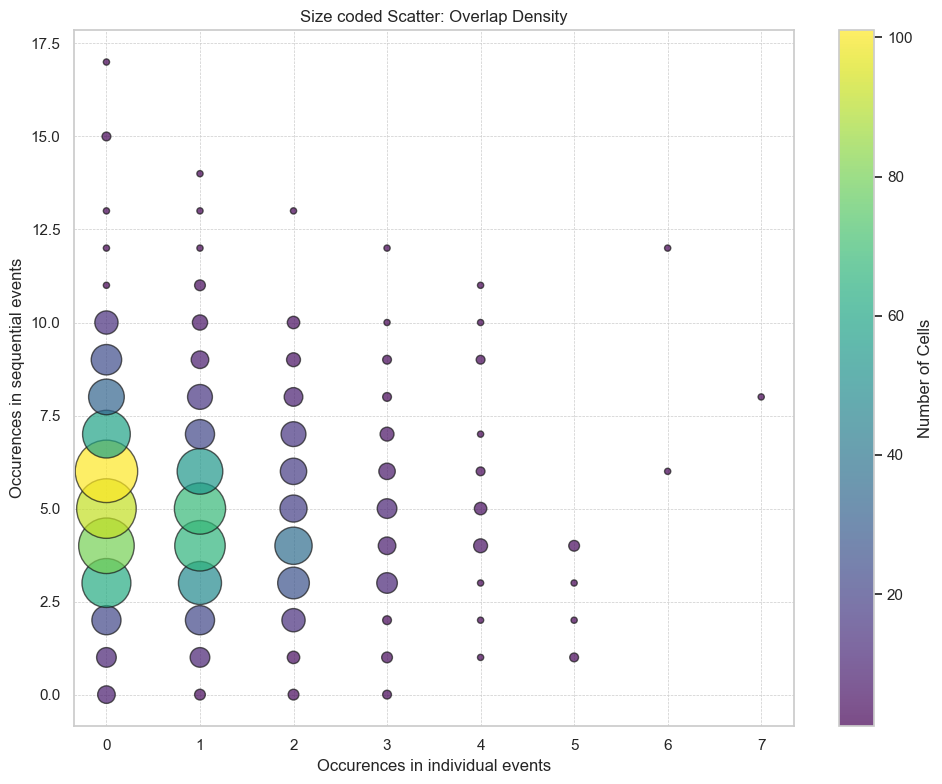

In [34]:
plot_scatter_size_coded(
    df=cells,
    x_col="Occurences in individual events",
    y_col="Occurences in sequential events",
    size_scale=20,
    figsize=(10, 8)
)